In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib as mpl

In [2]:
def shapiro_wilk_test(x):           
    shapiro_wilk_table = {
        "n": (None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
              35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50),
        0.01 : (None, None, None, 0.753, 0.687, 0.686, 0.713, 0.730, 0.749, 0.764, 0.781, 0.792, 0.805, 0.814, 0.825, 0.835, 0.844, 0.851, 
                0.858, 0.863, 0.868, 0.873, 0.878, 0.881, 0.884, 0.888, 0.891, 0.894, 0.896, 0.898, 0.900, 0.902, 0.904, 0.906, 0.908, 
                0.910, 0.912, 0.914, 0.916, 0.917, 0.919, 0.920, 0.922, 0.923, 0.924, 0.926, 0.927, 0.928, 0.929, 0.929, 0.930),
        0.05 : (None, None, None, 0.767, 0.748, 0.762, 0.788, 0.803, 0.818, 0.829, 0.842, 0.850, 0.859, 0.866, 0.874, 0.881, 0.887, 0.892, 
                0.897, 0.901, 0.905, 0.908, 0.911, 0.914, 0.916, 0.918, 0.920, 0.923, 0.924, 0.926, 0.927, 0.929, 0.930, 0.931, 0.933, 
                0.934, 0.935, 0.936, 0.938, 0.939, 0.940, 0.941, 0.942, 0.943, 0.944, 0.945, 0.945, 0.946, 0.947, 0.947, 0.947),
        0.10 : (None, None, None, 0.789, 0.792, 0.806, 0.826, 0.838, 0.851, 0.859, 0.869, 0.876, 0.883, 0.889, 0.895, 0.901, 0.906, 0.910, 
                0.914, 0.917, 0.920, 0.923, 0.926, 0.928, 0.930, 0.931, 0.933, 0.935, 0.936, 0.937, 0.939, 0.940, 0.941, 0.942, 0.943, 
                0.944, 0.945, 0.946, 0.947, 0.948, 0.949, 0.950, 0.951, 0.951, 0.952, 0.953, 0.953, 0.954, 0.954, 0.955, 0.955),
    }
    
    n_rep = x.size
    result = stats.shapiro(x)
       
    if result[0] > shapiro_wilk_table[0.01][n_rep]:
        alfa_0_01 = True
    else:
        alfa_0_01 = False
        
    if result[0] > shapiro_wilk_table[0.05][n_rep]:
        alfa_0_05 = True
    else:
        alfa_0_05 = False     
        
    if result[0] > shapiro_wilk_table[0.1][n_rep]:
        alfa_0_10 = True
    else:
        alfa_0_10 = False     
        
    return alfa_0_01, alfa_0_05, alfa_0_10


In [3]:
n_samples = 100
seeds = np.arange(1,n_samples+1)
rng = np.random.default_rng(42)
rng.shuffle(seeds)

## Dados Normais

In [4]:
alpha_0_10_result = []
alpha_0_05_result = []
alpha_0_01_result = []
n_result = []
for seed in seeds:
    data = stats.norm.rvs(loc=0, scale=1, size=50, random_state=seed)
    for i in range(3, data.size + 1):
        alfa_0_01, alfa_0_05, alfa_0_10 = shapiro_wilk_test(data[:i])
        alpha_0_10_result.append(alfa_0_10)
        alpha_0_05_result.append(alfa_0_05)
        alpha_0_01_result.append(alfa_0_01)
        n_result.append(i)

In [5]:
df_0_10 = pd.DataFrame({
    "n amostras": n_result,
    "Resultado": alpha_0_10_result,
})

df_0_05 = pd.DataFrame({
    "n amostras": n_result,    
    "Resultado": alpha_0_05_result,
})

df_0_01 = pd.DataFrame({
    "n amostras": n_result,    
    "Resultado": alpha_0_01_result,
})

In [6]:
def calc_power(df_data, n_samples):
    df = df_data.groupby([df_data.columns[0]])[df_data.columns[1]].value_counts().to_frame("Count")
    new_index = pd.MultiIndex.from_product(df.index.levels)
    new_df = df.reindex(new_index)
    new_df = new_df.fillna(0).astype(int)
    new_df["Porcentagem"] = new_df["Count"]*100/n_samples
    new_df = new_df.reset_index()
    return new_df[new_df[df_data.columns[1]] == False].reset_index(drop=True)

In [7]:
df_0_10_power = calc_power(df_0_10, n_samples)
df_0_10_power["Alpha"] = "0.10"

In [8]:
df_0_05_power = calc_power(df_0_05, n_samples)
df_0_05_power["Alpha"] = "0.05"

In [9]:
df_0_01_power = calc_power(df_0_01, n_samples)
df_0_01_power["Alpha"] = "0.01"

In [10]:
df_results = pd.concat([df_0_01_power, df_0_05_power, df_0_10_power])
df_results.head()

,n amostras,Resultado,Count,Porcentagem,Alpha
0,3,False,0,0.0,0.01
1,4,False,1,1.0,0.01
2,5,False,0,0.0,0.01
3,6,False,0,0.0,0.01
4,7,False,1,1.0,0.01


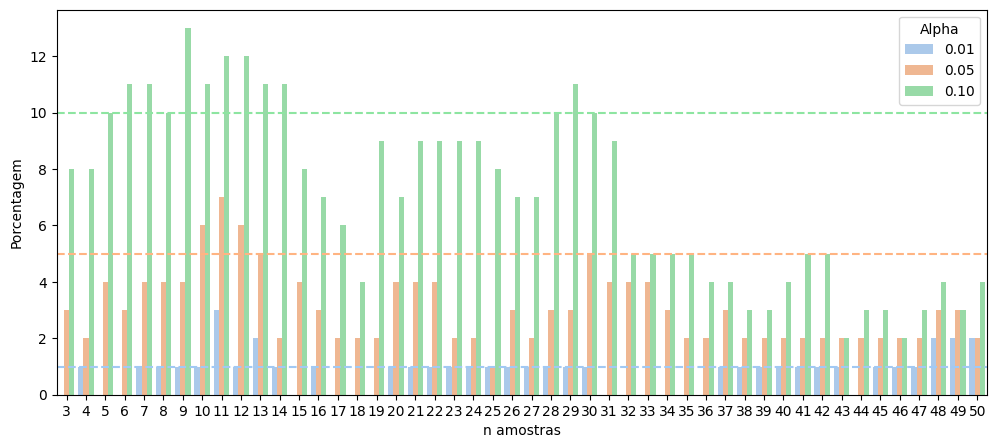

In [11]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.barplot(df_results, x="n amostras", y="Porcentagem", hue="Alpha", ax=ax, palette="pastel")
ax.axhline(1, c=sns.color_palette("pastel")[0], ls="--")
ax.axhline(5, c=sns.color_palette("pastel")[1], ls="--")
ax.axhline(10, c=sns.color_palette("pastel")[2], ls="--")
plt.show()

## Distribuição Uniforme

In [12]:
alpha_0_10_result = []
alpha_0_05_result = []
alpha_0_01_result = []
n_result = []
for seed in seeds:
    data = stats.uniform.rvs(loc=0, scale=1, size=50, random_state=seed)
    for i in range(3, data.size + 1):
        alfa_0_01, alfa_0_05, alfa_0_10 = shapiro_wilk_test(data[:i])
        alpha_0_10_result.append(alfa_0_10)
        alpha_0_05_result.append(alfa_0_05)
        alpha_0_01_result.append(alfa_0_01)
        n_result.append(i)

In [13]:
df_0_10 = pd.DataFrame({
    "n amostras": n_result,
    "Resultado": alpha_0_10_result,
})

df_0_05 = pd.DataFrame({
    "n amostras": n_result,    
    "Resultado": alpha_0_05_result,
})

df_0_01 = pd.DataFrame({
    "n amostras": n_result,    
    "Resultado": alpha_0_01_result,
})

In [14]:
df_0_10_power = calc_power(df_0_10, n_samples)
df_0_10_power["Alpha"] = "0.10"

In [15]:
df_0_05_power = calc_power(df_0_05, n_samples)
df_0_05_power["Alpha"] = "0.05"

In [16]:
df_0_01_power = calc_power(df_0_01, n_samples)
df_0_01_power["Alpha"] = "0.01"

In [17]:
df_results = pd.concat([df_0_01_power, df_0_05_power, df_0_10_power])
df_results.head()

,n amostras,Resultado,Count,Porcentagem,Alpha
0,3,False,1,1.0,0.01
1,4,False,0,0.0,0.01
2,5,False,1,1.0,0.01
3,6,False,0,0.0,0.01
4,7,False,0,0.0,0.01


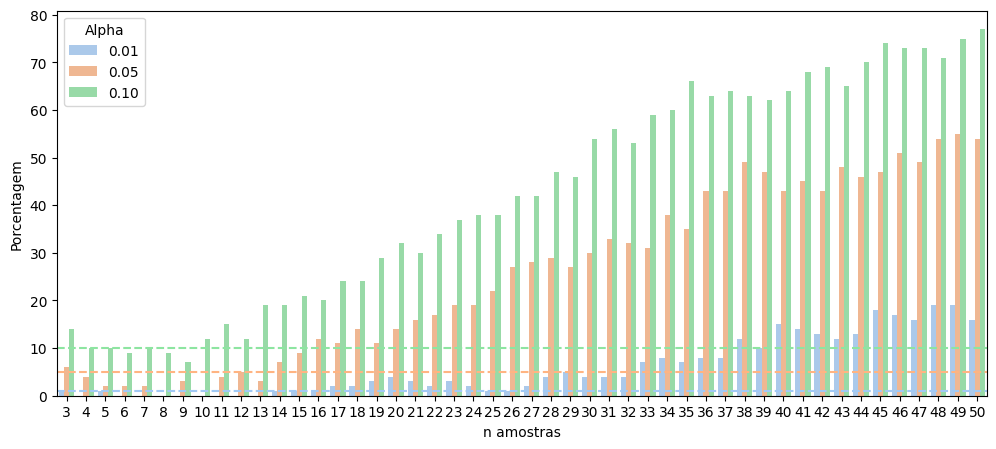

In [18]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.barplot(df_results, x="n amostras", y="Porcentagem", hue="Alpha", ax=ax, palette="pastel")
ax.axhline(1, c=sns.color_palette("pastel")[0], ls="--")
ax.axhline(5, c=sns.color_palette("pastel")[1], ls="--")
ax.axhline(10, c=sns.color_palette("pastel")[2], ls="--")
plt.show()

## Distribuição Beta (2,2)

In [19]:
alpha_0_10_result = []
alpha_0_05_result = []
alpha_0_01_result = []
n_result = []
for seed in seeds:
    data = stats.beta.rvs(a=2, b=2, loc=0, scale=1, size=50, random_state=seed)
    for i in range(3, data.size + 1):
        alfa_0_01, alfa_0_05, alfa_0_10 = shapiro_wilk_test(data[:i])
        alpha_0_10_result.append(alfa_0_10)
        alpha_0_05_result.append(alfa_0_05)
        alpha_0_01_result.append(alfa_0_01)
        n_result.append(i)

In [20]:
df_0_10 = pd.DataFrame({
    "n amostras": n_result,
    "Resultado": alpha_0_10_result,
})

df_0_05 = pd.DataFrame({
    "n amostras": n_result,    
    "Resultado": alpha_0_05_result,
})

df_0_01 = pd.DataFrame({
    "n amostras": n_result,    
    "Resultado": alpha_0_01_result,
})

In [21]:
df_0_10_power = calc_power(df_0_10, n_samples)
df_0_10_power["Alpha"] = "0.10"

In [22]:
df_0_05_power = calc_power(df_0_05, n_samples)
df_0_05_power["Alpha"] = "0.05"

In [23]:
df_0_01_power = calc_power(df_0_01, n_samples)
df_0_01_power["Alpha"] = "0.01"

In [24]:
df_results = pd.concat([df_0_01_power, df_0_05_power, df_0_10_power])
df_results.head()

,n amostras,Resultado,Count,Porcentagem,Alpha
0,3,False,1,1.0,0.01
1,4,False,0,0.0,0.01
2,5,False,0,0.0,0.01
3,6,False,0,0.0,0.01
4,7,False,0,0.0,0.01


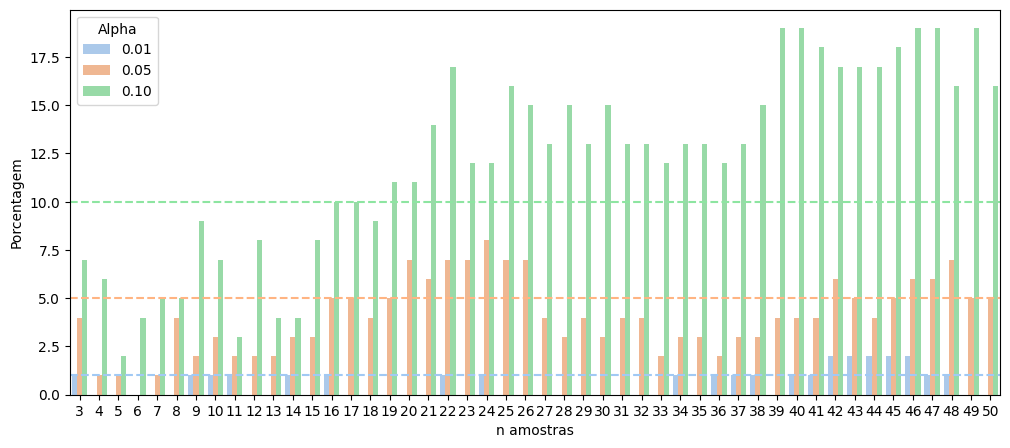

In [25]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.barplot(df_results, x="n amostras", y="Porcentagem", hue="Alpha", ax=ax, palette="pastel")
ax.axhline(1, c=sns.color_palette("pastel")[0], ls="--")
ax.axhline(5, c=sns.color_palette("pastel")[1], ls="--")
ax.axhline(10, c=sns.color_palette("pastel")[2], ls="--")
plt.show()

## Distribuição Laplace

In [26]:
alpha_0_10_result = []
alpha_0_05_result = []
alpha_0_01_result = []
n_result = []
for seed in seeds:
    data = stats.laplace.rvs(loc=0, scale=1, size=50, random_state=seed)
    for i in range(3, data.size + 1):
        alfa_0_01, alfa_0_05, alfa_0_10 = shapiro_wilk_test(data[:i])
        alpha_0_10_result.append(alfa_0_10)
        alpha_0_05_result.append(alfa_0_05)
        alpha_0_01_result.append(alfa_0_01)
        n_result.append(i)

In [27]:
df_0_10 = pd.DataFrame({
    "n amostras": n_result,
    "Resultado": alpha_0_10_result,
})

df_0_05 = pd.DataFrame({
    "n amostras": n_result,    
    "Resultado": alpha_0_05_result,
})

df_0_01 = pd.DataFrame({
    "n amostras": n_result,    
    "Resultado": alpha_0_01_result,
})

In [28]:
df_0_10_power = calc_power(df_0_10, n_samples)
df_0_10_power["Alpha"] = "0.10"

In [29]:
df_0_05_power = calc_power(df_0_05, n_samples)
df_0_05_power["Alpha"] = "0.05"

In [30]:
df_0_01_power = calc_power(df_0_01, n_samples)
df_0_01_power["Alpha"] = "0.01"

In [31]:
df_results = pd.concat([df_0_01_power, df_0_05_power, df_0_10_power])

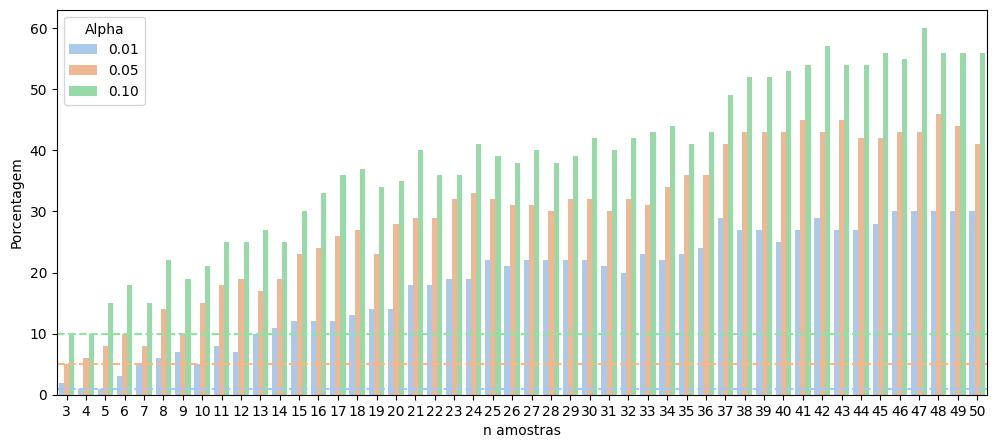

In [32]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.barplot(df_results, x="n amostras", y="Porcentagem", hue="Alpha", ax=ax, palette="pastel")
ax.axhline(1, c=sns.color_palette("pastel")[0], ls="--")
ax.axhline(5, c=sns.color_palette("pastel")[1], ls="--")
ax.axhline(10, c=sns.color_palette("pastel")[2], ls="--")
plt.show()

## Distribuição Beta (6,2)

In [33]:
alpha_0_10_result = []
alpha_0_05_result = []
alpha_0_01_result = []
n_result = []
for seed in seeds:
    data = stats.beta.rvs(a=6, b=2, loc=0, scale=1, size=50, random_state=seed)
    for i in range(3, data.size + 1):
        alfa_0_01, alfa_0_05, alfa_0_10 = shapiro_wilk_test(data[:i])
        alpha_0_10_result.append(alfa_0_10)
        alpha_0_05_result.append(alfa_0_05)
        alpha_0_01_result.append(alfa_0_01)
        n_result.append(i)

In [34]:
df_0_10 = pd.DataFrame({
    "n amostras": n_result,
    "Resultado": alpha_0_10_result,
})

df_0_05 = pd.DataFrame({
    "n amostras": n_result,    
    "Resultado": alpha_0_05_result,
})

df_0_01 = pd.DataFrame({
    "n amostras": n_result,    
    "Resultado": alpha_0_01_result,
})

In [35]:
df_0_10_power = calc_power(df_0_10, n_samples)
df_0_10_power["Alpha"] = "0.10"

In [36]:
df_0_05_power = calc_power(df_0_05, n_samples)
df_0_05_power["Alpha"] = "0.05"

In [37]:
df_0_01_power = calc_power(df_0_01, n_samples)
df_0_01_power["Alpha"] = "0.01"

In [38]:
df_results = pd.concat([df_0_01_power, df_0_05_power, df_0_10_power])

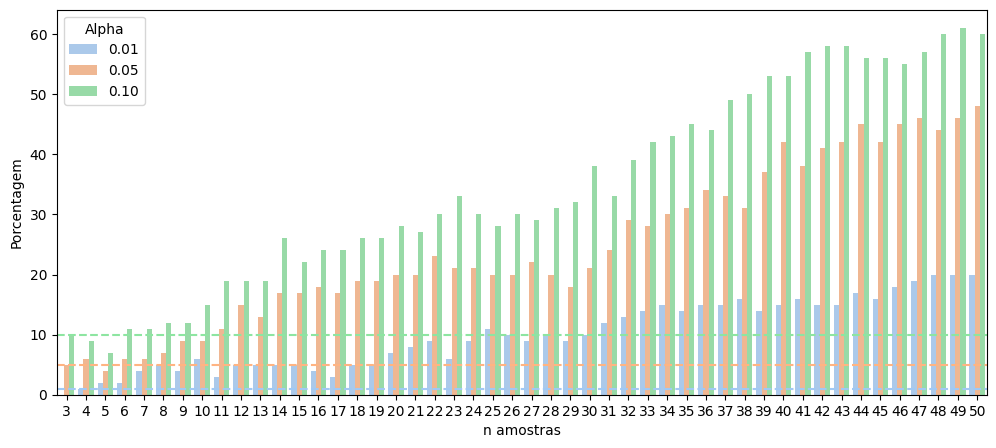

In [39]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.barplot(df_results, x="n amostras", y="Porcentagem", hue="Alpha", ax=ax, palette="pastel")
ax.axhline(1, c=sns.color_palette("pastel")[0], ls="--")
ax.axhline(5, c=sns.color_palette("pastel")[1], ls="--")
ax.axhline(10, c=sns.color_palette("pastel")[2], ls="--")
plt.show()

## Distribuição Beta (2,1)

In [40]:
alpha_0_10_result = []
alpha_0_05_result = []
alpha_0_01_result = []
n_result = []
for seed in seeds:
    data = stats.beta.rvs(a=2, b=1, loc=0, scale=1, size=50, random_state=seed)
    for i in range(3, data.size + 1):
        alfa_0_01, alfa_0_05, alfa_0_10 = shapiro_wilk_test(data[:i])
        alpha_0_10_result.append(alfa_0_10)
        alpha_0_05_result.append(alfa_0_05)
        alpha_0_01_result.append(alfa_0_01)
        n_result.append(i)

In [41]:
df_0_10 = pd.DataFrame({
    "n amostras": n_result,
    "Resultado": alpha_0_10_result,
})

df_0_05 = pd.DataFrame({
    "n amostras": n_result,    
    "Resultado": alpha_0_05_result,
})

df_0_01 = pd.DataFrame({
    "n amostras": n_result,    
    "Resultado": alpha_0_01_result,
})

In [42]:
df_0_10_power = calc_power(df_0_10, n_samples)
df_0_10_power["Alpha"] = "0.10"

In [43]:
df_0_05_power = calc_power(df_0_05, n_samples)
df_0_05_power["Alpha"] = "0.05"

In [44]:
df_0_01_power = calc_power(df_0_01, n_samples)
df_0_01_power["Alpha"] = "0.01"

In [45]:
df_results = pd.concat([df_0_01_power, df_0_05_power, df_0_10_power])

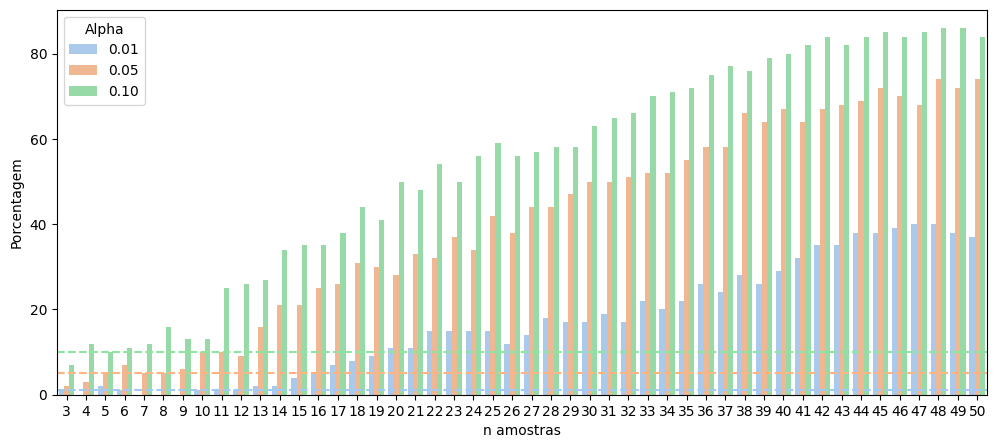

In [46]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.barplot(df_results, x="n amostras", y="Porcentagem", hue="Alpha", ax=ax, palette="pastel")
ax.axhline(1, c=sns.color_palette("pastel")[0], ls="--")
ax.axhline(5, c=sns.color_palette("pastel")[1], ls="--")
ax.axhline(10, c=sns.color_palette("pastel")[2], ls="--")
plt.show()

## Distribuição Gamma (5)

In [47]:
alpha_0_10_result = []
alpha_0_05_result = []
alpha_0_01_result = []
n_result = []
for seed in seeds:
    data = stats.gamma.rvs(a=5, loc=0, scale=1, size=50, random_state=seed)
    for i in range(3, data.size + 1):
        alfa_0_01, alfa_0_05, alfa_0_10 = shapiro_wilk_test(data[:i])
        alpha_0_10_result.append(alfa_0_10)
        alpha_0_05_result.append(alfa_0_05)
        alpha_0_01_result.append(alfa_0_01)
        n_result.append(i)

In [48]:
df_0_10 = pd.DataFrame({
    "n amostras": n_result,
    "Resultado": alpha_0_10_result,
})

df_0_05 = pd.DataFrame({
    "n amostras": n_result,    
    "Resultado": alpha_0_05_result,
})

df_0_01 = pd.DataFrame({
    "n amostras": n_result,    
    "Resultado": alpha_0_01_result,
})

In [49]:
df_0_10_power = calc_power(df_0_10, n_samples)
df_0_10_power["Alpha"] = "0.10"

In [50]:
df_0_05_power = calc_power(df_0_05, n_samples)
df_0_05_power["Alpha"] = "0.05"

In [51]:
df_0_01_power = calc_power(df_0_01, n_samples)
df_0_01_power["Alpha"] = "0.01"

In [52]:
df_results = pd.concat([df_0_01_power, df_0_05_power, df_0_10_power])

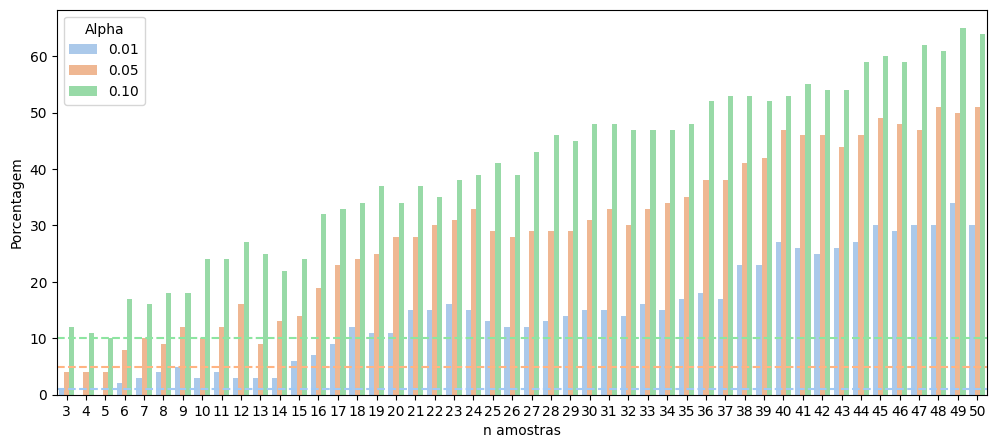

In [53]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.barplot(df_results, x="n amostras", y="Porcentagem", hue="Alpha", ax=ax, palette="pastel")
ax.axhline(1, c=sns.color_palette("pastel")[0], ls="--")
ax.axhline(5, c=sns.color_palette("pastel")[1], ls="--")
ax.axhline(10, c=sns.color_palette("pastel")[2], ls="--")
plt.show()

## Distribuição chi2 (df=2)

In [54]:
alpha_0_10_result = []
alpha_0_05_result = []
alpha_0_01_result = []
n_result = []
for seed in seeds:
    data = stats.chi2.rvs(df=2, loc=0, scale=1, size=50, random_state=seed)
    for i in range(3, data.size + 1):
        alfa_0_01, alfa_0_05, alfa_0_10 = shapiro_wilk_test(data[:i])
        alpha_0_10_result.append(alfa_0_10)
        alpha_0_05_result.append(alfa_0_05)
        alpha_0_01_result.append(alfa_0_01)
        n_result.append(i)

In [55]:
df_0_10 = pd.DataFrame({
    "n amostras": n_result,
    "Resultado": alpha_0_10_result,
})

df_0_05 = pd.DataFrame({
    "n amostras": n_result,    
    "Resultado": alpha_0_05_result,
})

df_0_01 = pd.DataFrame({
    "n amostras": n_result,    
    "Resultado": alpha_0_01_result,
})

In [56]:
df_0_10_power = calc_power(df_0_10, n_samples)
df_0_10_power["Alpha"] = "0.10"

In [57]:
df_0_05_power = calc_power(df_0_05, n_samples)
df_0_05_power["Alpha"] = "0.05"

In [58]:
df_0_01_power = calc_power(df_0_01, n_samples)
df_0_01_power["Alpha"] = "0.01"

In [59]:
df_results = pd.concat([df_0_01_power, df_0_05_power, df_0_10_power])

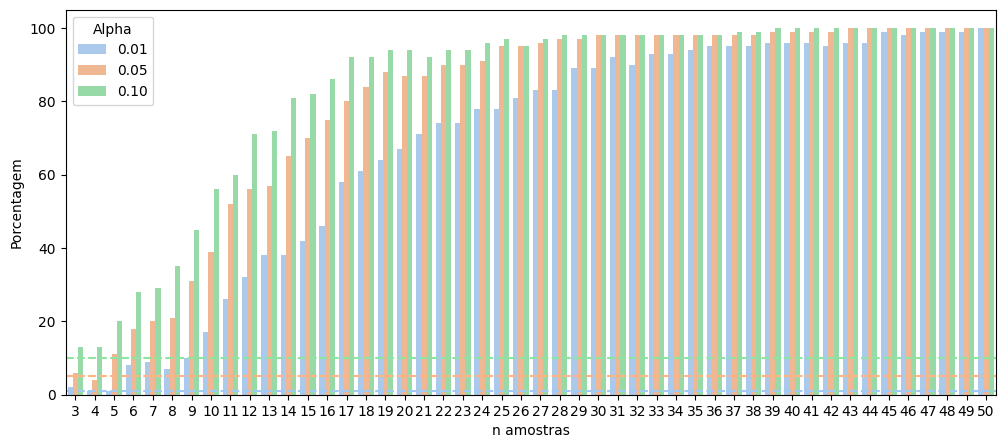

In [60]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.barplot(df_results, x="n amostras", y="Porcentagem", hue="Alpha", ax=ax, palette="pastel")
ax.axhline(1, c=sns.color_palette("pastel")[0], ls="--")
ax.axhline(5, c=sns.color_palette("pastel")[1], ls="--")
ax.axhline(10, c=sns.color_palette("pastel")[2], ls="--")
plt.show()

## Distribuição Chi2 (df=20)

In [61]:
alpha_0_10_result = []
alpha_0_05_result = []
alpha_0_01_result = []
n_result = []
for seed in seeds:
    data = stats.chi2.rvs(df=20, loc=0, scale=1, size=50, random_state=seed)
    for i in range(3, data.size + 1):
        alfa_0_01, alfa_0_05, alfa_0_10 = shapiro_wilk_test(data[:i])
        alpha_0_10_result.append(alfa_0_10)
        alpha_0_05_result.append(alfa_0_05)
        alpha_0_01_result.append(alfa_0_01)
        n_result.append(i)

In [62]:
df_0_10 = pd.DataFrame({
    "n amostras": n_result,
    "Resultado": alpha_0_10_result,
})

df_0_05 = pd.DataFrame({
    "n amostras": n_result,    
    "Resultado": alpha_0_05_result,
})

df_0_01 = pd.DataFrame({
    "n amostras": n_result,    
    "Resultado": alpha_0_01_result,
})

In [63]:
df_0_10_power = calc_power(df_0_10, n_samples)
df_0_10_power["Alpha"] = "0.10"

In [64]:
df_0_05_power = calc_power(df_0_05, n_samples)
df_0_05_power["Alpha"] = "0.05"

In [65]:
df_0_01_power = calc_power(df_0_01, n_samples)
df_0_01_power["Alpha"] = "0.01"

In [66]:
df_results = pd.concat([df_0_01_power, df_0_05_power, df_0_10_power])

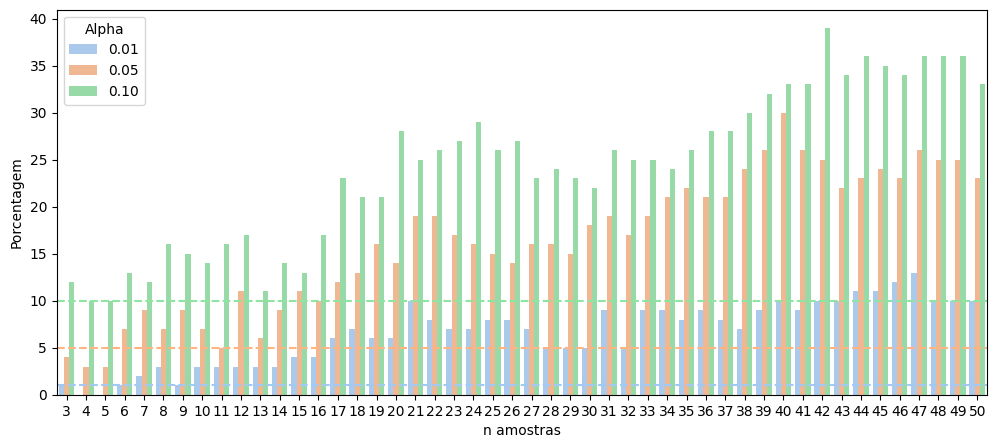

In [67]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.barplot(df_results, x="n amostras", y="Porcentagem", hue="Alpha", ax=ax, palette="pastel")
ax.axhline(1, c=sns.color_palette("pastel")[0], ls="--")
ax.axhline(5, c=sns.color_palette("pastel")[1], ls="--")
ax.axhline(10, c=sns.color_palette("pastel")[2], ls="--")
plt.show()